<a href="https://colab.research.google.com/github/karthikpuranik11/FIRE2021/blob/main/Malayalam/ULMFiT_Malayalam_transliterated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
train1=pd.read_csv('/content/mal_final.csv')
train1

,Unnamed: 0,Unnamed: 0.1,text,category,trans,translation
0,0,0,Sunny chechi fans evide like adichu power kani...,unknown_state,{'ml': 'സുന്നി ചെച്ചി ഫാൻസ് എവിടെ ലൈക് അടിച്ച്...,"Sunny Cheung francs, 1992."
1,1,1,Angane july month ile ende aadyathe leave njan...,Positive,{'ml': 'അങ്ങനെ ജൂലൈ മോന്ത് എലി എന്ടെ ആദ്യത്തെ ...,"So, July, July 5th, July 5th, I'm on my first ..."
2,2,2,ഏട്ടന്റെ പുതിയ പടത്തിനു വേണ്ടി കാത്തിരിക്കുന്ന...,unknown_state,{'ml': 'ഏട്ടന്റെ പുതിയ പടത്തിനു വേണ്ടി കാത്തിര...,Those waiting for my brother's new show---
3,3,3,ഇനി ലാലേട്ടന്റെ വേട്ട തുടങ്ങാൻ പോകുന്നു..........,Positive,{'ml': 'ഇനി ലാലേട്ടന്റെ വേട്ട തുടങ്ങാൻ പോകുന്ന...,"Now, I'm going to begin the hunt of Laeddis......"
4,4,4,Trailer powli oru raksha illa . Pakshea padam ...,Positive,{'ml': 'ട്രൈലർ പോളി ഒരു രക്ഷ ഇല്ല . പക്ഷീ പദം ...,The trilom system has no escape.
...,...,...,...,...,...,...
15883,15883,15883,Minimum 10 thavana kandavar maathram like adi,unknown_state,{'ml': 'മിനിമം 10 തവണ കണ്ടവർ മാത്രം ലൈക് അടി'},Only those who have seen 10 times have a license.
15884,15884,15884,Please cinema kaannaaan kothi aakunnu onnu rel...,Positive,{'ml': 'പ്ലീസ് സിനിമ കാണ്ണാൻ കൊത്തി ആകുന്നു ഒന...,"Please, let's just sign the film. Please."
15885,15885,15885,USA ok.. India No... Sadhacharam,unknown_state,{'ml': 'ഉഷ ഓക്.. ഇൻഡ്യ നോ... സദ്ചചരം'},Good-bye!
15886,15886,15886,nama hero december 12 wait & see mamamaga mah...,Positive,{'ml': 'നമഃ ഹീറോ ഡിസംബർ 12 വാറ്റ് & സീ മാമാമാ ...,The date of December 12 of the 12th Cygm 3 Cyg...


In [3]:
for i in range(len(train1)):
  train1['trans'][i]=train1['trans'][i][8:-2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [4]:
for i in range(len(train1)):
  if train1['category'][i]=='not-malayalam':
    train1['trans'][i]='NaN'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
train=pd.DataFrame(columns=['category','text'])
train['category']=train1['category'].append(train1['category'])
train['text']=train1['text'].append(train1['trans'])
train

,category,text
0,unknown_state,Sunny chechi fans evide like adichu power kani...
1,Positive,Angane july month ile ende aadyathe leave njan...
2,unknown_state,ഏട്ടന്റെ പുതിയ പടത്തിനു വേണ്ടി കാത്തിരിക്കുന്ന...
3,Positive,ഇനി ലാലേട്ടന്റെ വേട്ട തുടങ്ങാൻ പോകുന്നു..........
4,Positive,Trailer powli oru raksha illa . Pakshea padam ...
...,...,...
15883,unknown_state,മിനിമം 10 തവണ കണ്ടവർ മാത്രം ലൈക് അടി
15884,Positive,പ്ലീസ് സിനിമ കാണ്ണാൻ കൊത്തി ആകുന്നു ഒന്ന് റിലീ...
15885,unknown_state,ഉഷ ഓക്.. ഇൻഡ്യ നോ... സദ്ചചരം
15886,Positive,നമഃ ഹീറോ ഡിസംബർ 12 വാറ്റ് & സീ മാമാമാ മഹാ മാഗ്...


In [6]:
train=train.dropna()

In [7]:
val=pd.read_csv('/content/Mal_sentiment_full_test_withlabels.tsv', sep="\t")
#val['tweet']=val['text']
#val=val.drop(columns=['Unnamed: 2','text'])
val

,id,text,category
0,Mal_1,Teaserinu kurach samayamkoodi mathram. Cant wa...,Positive
1,Mal_2,അപ്പോൾ കഥയുടെ റൂട്ട് മാറിയല്ലോ...,unknown_state
2,Mal_3,മൂത്തോൻ ട്രൈലെർ Trending List വരാത്തത് എന്താ ?,unknown_state
3,Mal_4,Nowadays 944k views is considered as 1M views ...,not-malayalam
4,Mal_5,Maass.trailer ennu paranja ithaanU makkale.......,Positive
...,...,...,...
1957,Mal_1958,Expression വച്ചു നോക്കുമ്പോൾ മൂക്കുത്തി കട്ടത്...,unknown_state
1958,Mal_1959,എനിക്ക് ഒരു 100 like തരുമോ,unknown_state
1959,Mal_1960,Nannayi onnu poliyunna lakshnm unde...Thrill m...,Negative
1960,Mal_1961,Athikam eduthu kayatti vekkenda....direction k...,Mixed_feelings


In [8]:
df=train.filter(['category','text'], axis=1)
df_test=val.filter(['category','text'],axis=1)

In [9]:
#removing @ and #
def punc(df):
    df['text'] = df['text'].str.replace('[#@()]','')
    print(df)

In [10]:
punc(df)
punc(df_test)

             category                                               text
0       unknown_state  Sunny chechi fans evide like adichu power kani...
1            Positive  Angane july month ile ende aadyathe leave njan...
2       unknown_state  ഏട്ടന്റെ പുതിയ പടത്തിനു വേണ്ടി കാത്തിരിക്കുന്ന...
3            Positive  ഇനി ലാലേട്ടന്റെ വേട്ട തുടങ്ങാൻ പോകുന്നു..........
4            Positive  Trailer powli oru raksha illa . Pakshea padam ...
...               ...                                                ...
15883   unknown_state               മിനിമം 10 തവണ കണ്ടവർ മാത്രം ലൈക് അടി
15884        Positive  പ്ലീസ് സിനിമ കാണ്ണാൻ കൊത്തി ആകുന്നു ഒന്ന് റിലീ...
15885   unknown_state                       ഉഷ ഓക്.. ഇൻഡ്യ നോ... സദ്ചചരം
15886        Positive  നമഃ ഹീറോ ഡിസംബർ 12 വാറ്റ് & സീ മാമാമാ മഹാ മാഗ്...
15887  Mixed_feelings  മധുരരാജ 1 ഹോർ 40 എറി ലിക്ക്സ് ലൂസിഫർ 1 മിൻ 40 ...

[31776 rows x 2 columns]
            category                                               text
0           Positive  Teas

In [11]:
import fastai
from fastai import *
from fastai.text import * 
from functools import partial
import io
import os

In [12]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df, valid_df = df_test, path = "")

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [13]:
data_lm.show_batch

<bound method DataBunch.show_batch of TextLMDataBunch;

Train: LabelList (31776 items)
x: LMTextList
xxbos xxmaj sunny chechi fans evide like adichu power xxunk 🤣 🤣,xxbos xxmaj angane july month ile ende xxunk leave njan angu edukuva xxmaj july 5 nu,xxbos ഏട്ടന്റെ പുതിയ പടത്തിനു വേണ്ടി കാത്തിരിക്കുന്നവർ ലൈക്‌ ബട്ടൺ അടിച്ചു പോളിക്കോ xxrep 11 -,xxbos ഇനി ലാലേട്ടന്റെ വേട്ട തുടങ്ങാൻ പോകുന്നു xxrep 7 . മുൻ കാല collection recordukal ഭേതിച്ചിരിക്കും,xxbos xxmaj trailer powli oru raksha illa . xxmaj xxunk padam xxunk xxunk over degrade venda padam xxunk paraya
y: LMLabelList
,,,,
Path: .;

Valid: LabelList (1962 items)
x: LMTextList
xxbos xxmaj teaserinu kurach xxunk mathram . xxmaj ca nt wait ..,xxbos അപ്പോൾ കഥയുടെ xxunk മാറിയല്ലോ ...,xxbos മൂത്തോൻ ട്രൈലെർ xxmaj trending xxmaj list വരാത്തത് എന്താ ?,xxbos xxmaj xxunk xxunk views is xxunk as 1 m views in kerala,xxbos xxmaj xxunk ennu paranja ithaanu makkale xxrep 5 . katta waiting for xxmaj lucifer
y: LMLabelList
,,,,
Path: .;

Test: None>

In [14]:
#loading AWD_LSTM language model
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 5.01E-02
Min loss divided by 10: 6.31E-02


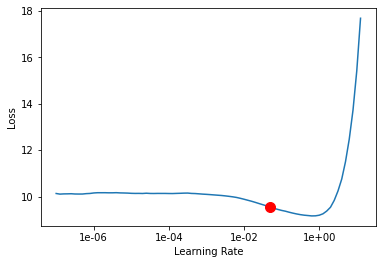

In [15]:
#to find the optimal learning rate
learn.lr_find(start_lr=1e-8, end_lr=1e2)
learn.recorder.plot(suggestion = True)


In [16]:
#fitting the data
learn.fit_one_cycle(2, 5e-2)
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time
0,6.858369,5.215383,0.282813,00:23
1,5.326839,4.997633,0.297098,00:23


In [17]:
learn.fit_one_cycle(3, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.539963,5.001811,0.296652,00:29
1,3.877705,4.932861,0.310938,00:29
2,2.869240,5.029199,0.311320,00:30


In [18]:
learn.freeze_to(-1)
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 3.31E-04
Min loss divided by 10: 6.31E-04


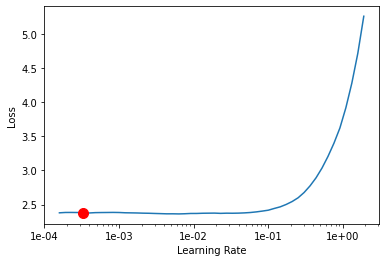

In [19]:
learn.recorder.plot(skip_start=40, suggestion=True)

In [20]:
learn.fit_one_cycle(3, slice(1e-2/(2.6**4), 1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,2.465408,5.103486,0.307302,00:25
1,2.306634,5.147399,0.311193,00:26
2,2.024259,5.169843,0.310045,00:26


In [21]:
learn.freeze_to(-2)
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.58E-04
Min loss divided by 10: 3.31E-05


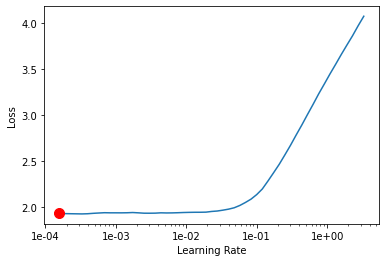

In [22]:
learn.recorder.plot(skip_start=40, suggestion=True)

In [23]:
learn.fit_one_cycle(3, slice(6e-3/(2.6**4), 6e-3))

epoch,train_loss,valid_loss,accuracy,time
0,1.992320,5.304812,0.301052,00:27
1,1.930140,5.340995,0.305517,00:27
2,1.741470,5.396964,0.306027,00:27


In [24]:
#save the encoder model
learn.save_encoder('my_encoder')

In [25]:
# Classifier model data
data_clas = TextClasDataBunch.from_df(path = "", train_df = df, valid_df = df_test, vocab=data_lm.train_ds.vocab, bs=32)

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [26]:
#building classifier
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, metrics=[accuracy, FBeta(beta=1)])

#loading the saved encoder
learn.load_encoder('my_encoder')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (31776 items)
x: TextList
xxbos xxmaj sunny chechi fans evide like adichu power xxunk 🤣 🤣,xxbos xxmaj angane july month ile ende xxunk leave njan angu edukuva xxmaj july 5 nu,xxbos ഏട്ടന്റെ പുതിയ പടത്തിനു വേണ്ടി കാത്തിരിക്കുന്നവർ ലൈക്‌ ബട്ടൺ അടിച്ചു പോളിക്കോ xxrep 11 -,xxbos ഇനി ലാലേട്ടന്റെ വേട്ട തുടങ്ങാൻ പോകുന്നു xxrep 7 . മുൻ കാല collection recordukal ഭേതിച്ചിരിക്കും,xxbos xxmaj trailer powli oru raksha illa . xxmaj xxunk padam xxunk xxunk over degrade venda padam xxunk paraya
y: CategoryList
unknown_state,Positive,unknown_state,Positive,Positive
Path: .;

Valid: LabelList (1962 items)
x: TextList
xxbos xxmaj teaserinu kurach xxunk mathram . xxmaj ca nt wait ..,xxbos അപ്പോൾ കഥയുടെ xxunk മാറിയല്ലോ ...,xxbos മൂത്തോൻ ട്രൈലെർ xxmaj trending xxmaj list വരാത്തത് എന്താ ?,xxbos xxmaj xxunk xxunk views is xxunk as 1 m views in kerala,xxbos xxmaj xxunk ennu paranja ithaanu makkale xxrep 5 . katta waiting for xxmaj lucifer
y: CategoryList
Pos

epoch,train_loss,valid_loss,accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-02
Min loss divided by 10: 1.74E-02


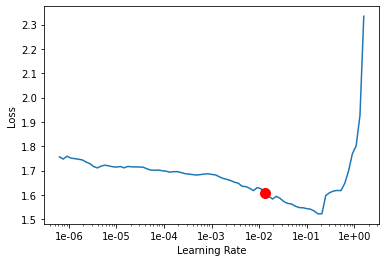

In [27]:
learn.lr_find()
learn.recorder.plot(suggestion=True)


In [28]:
learn.fit_one_cycle(3, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,1.141386,1.066801,0.580530,0.456207,00:16
1,1.112457,1.009933,0.606014,0.508456,00:15
2,1.022210,0.993843,0.617737,0.529332,00:16


/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


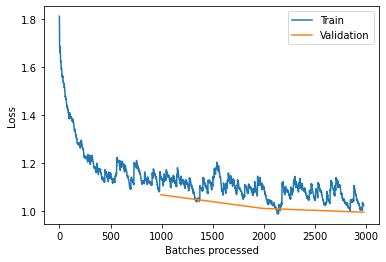

In [29]:
learn.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.91E-06
Min loss divided by 10: 3.31E-05


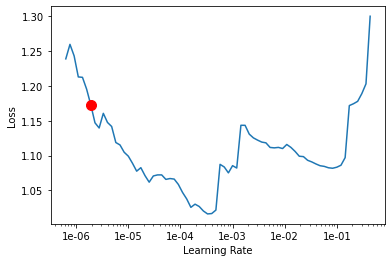

In [30]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [31]:
learn.freeze_to(-2) # unfreeze last 2 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,1.022436,0.948202,0.622324,0.492400,00:19
1,0.930547,0.911002,0.642712,0.548673,00:18


/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


epoch,train_loss,valid_loss,accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 5.75E-06
Min loss divided by 10: 7.59E-08


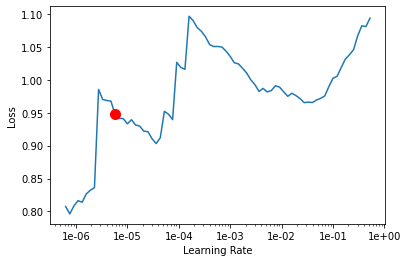

In [32]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [33]:
learn.freeze_to(-3)
learn.fit_one_cycle(2, slice(5.3e-3/(2.6**4),5.31e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.917142,0.868567,0.652395,0.552146,00:30
1,0.724796,0.853478,0.674822,0.597513,00:31


/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


In [34]:
learn.freeze_to(-4) # unfreeze last 4 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))
learn.freeze_to(-5) # unfreeze last 5 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

# Unfreezing all the layers and training
learn.unfreeze() # unfreze all
learn.fit_one_cycle(3, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.676917,0.873637,0.659021,0.582114,00:39
1,0.521886,0.890297,0.674822,0.603519,00:39


/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.551708,0.930919,0.683996,0.599558,00:46
1,0.430380,0.921174,0.694190,0.635037,00:45


/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.412512,0.983169,0.706422,0.642510,00:45
1,0.343503,1.032011,0.702345,0.647159,00:45
2,0.310003,1.038558,0.701325,0.646221,00:46


/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


In [35]:
#getting the predictions
preds, targets = learn.get_preds()
predictions = np.argmax(preds, axis = 1)

In [36]:
pd.crosstab(predictions, targets)

col_0,0,1,2,3,4
row_0,,,,,
0,47,15,9,2,16
1,21,141,37,1,42
2,35,57,623,17,112
3,2,1,16,112,20
4,29,44,95,15,453


In [37]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
cm=confusion_matrix(predictions,targets)
print(cm)
score = accuracy_score( predictions, targets)
print(score)

[[ 47  15   9   2  16]
 [ 21 141  37   1  42]
 [ 35  57 623  17 112]
 [  2   1  16 112  20]
 [ 29  44  95  15 453]]
0.7013251783893986


In [38]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(predictions,targets, zero_division=0, digits=4))

              precision    recall  f1-score   support

           0     0.3507    0.5281    0.4215        89
           1     0.5465    0.5826    0.5640       242
           2     0.7987    0.7382    0.7672       844
           3     0.7619    0.7417    0.7517       151
           4     0.7045    0.7123    0.7084       636

    accuracy                         0.7013      1962
   macro avg     0.6325    0.6606    0.6426      1962
weighted avg     0.7139    0.7013    0.7062      1962

